In [1]:
import numpy as np

# Example projections array of shape (180, 256, 256)
projections = np.random.rand(180, 256, 256)  # Replace this with your actual data

# Step 1: Generate 90 unique random indices between 0 and 179 (representing angles in degrees)
random_indices = np.random.choice(180, size=90, replace=False)  # No duplicates
random_indices.sort()  # Optional: Sort the indices for convenience

# Step 2: Select the corresponding projections
selected_projections = projections[random_indices]

# Step 3: Convert the selected indices (angles in degrees) to radians
angles_in_radians = random_indices * (np.pi / 180)

# Print the results
print("Randomly selected indices (angles in degrees):")
print(random_indices)

print("\nCorresponding angles in radians:")
print(angles_in_radians)

print("\nShape of selected projections:")
print(selected_projections.shape)  # Should be (90, 256, 256)


Randomly selected indices (angles in degrees):
[  1   2   3   4   6   8   9  11  13  16  18  19  21  25  26  30  35  39
  42  45  46  47  49  52  53  54  55  58  59  60  63  64  65  66  71  74
  75  77  81  85  86  87  90  92  93  94  95  97 101 102 103 110 112 113
 115 119 121 122 123 124 125 130 133 134 136 139 140 141 143 145 146 147
 148 149 151 156 157 159 160 162 164 167 169 170 171 172 173 174 175 179]

Corresponding angles in radians:
[0.01745329 0.03490659 0.05235988 0.06981317 0.10471976 0.13962634
 0.15707963 0.19198622 0.2268928  0.27925268 0.31415927 0.33161256
 0.36651914 0.43633231 0.45378561 0.52359878 0.61086524 0.68067841
 0.73303829 0.78539816 0.80285146 0.82030475 0.85521133 0.90757121
 0.9250245  0.9424778  0.95993109 1.01229097 1.02974426 1.04719755
 1.09955743 1.11701072 1.13446401 1.15191731 1.23918377 1.29154365
 1.30899694 1.34390352 1.41371669 1.48352986 1.50098316 1.51843645
 1.57079633 1.60570291 1.6231562  1.6406095  1.65806279 1.69296937
 1.76278254 1.780

Twilight shifted. Vediamo come si mappano i colori generando un campione di dati.

In [3]:
import numpy as np

# Define the cube dimensions
dimensions = (256, 256, 256)

# Generate the cube with values increasing from 0 to 1 along the height
cube = np.linspace(0, 1, dimensions[2]).reshape(1, 1, -1)
cube = np.tile(cube, (dimensions[0], dimensions[1], 1)).transpose(0, 1, 2)

np.save('../data/z-bin/cube', cube)



Inspecting activations.

In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define a simple network
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.fc1(x)
        # self.fc1_activations = x  # Save activations for visualization
        x = self.relu(x)
        # self.fc2_input = x        # Save input to fc2 for visualization
        x = self.fc2(x)
        return x

model = SimpleModel()

In [8]:
for name, module in model.named_modules():
    if isinstance(module, nn.Linear):
        print(name)

fc1
fc2


In [9]:
# Create a dictionary to store activations
activations = {}

# Hook function to save activations
def hook_fn(module, input, output):
    activations[module] = output.detach().cpu().numpy()

# Register hooks on selected layers
for name, module in model.named_modules():
    if isinstance(module, nn.Linear):
        module.register_forward_hook(hook_fn)

# Dummy data for training
batch_size = 32
input_data = torch.randn(batch_size, 10, dtype=torch.float32)               # shape: (32, 10)
target = torch.randint(0, 10, (batch_size,))                        # shape: (32,)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [13]:
torch.randint(low=0, high=10, size=(batch_size,))

tensor([2, 2, 5, 0, 1, 4, 8, 1, 5, 3, 5, 5, 7, 9, 3, 5, 2, 6, 7, 8, 8, 9, 1, 1,
        8, 1, 6, 4, 3, 0, 7, 5])

Epoch 1, Loss: 2.3412041664123535


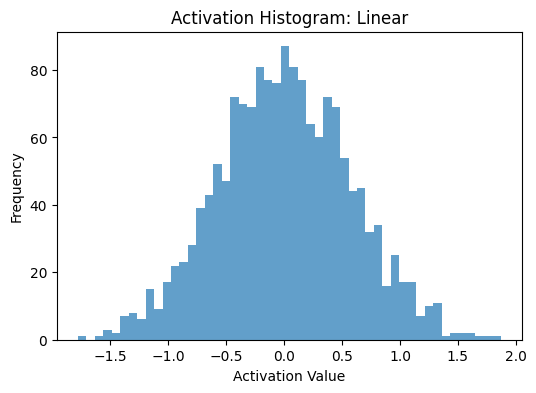

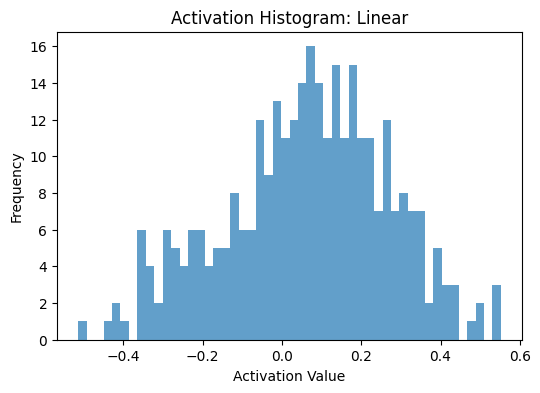

Epoch 2, Loss: 2.3287339210510254


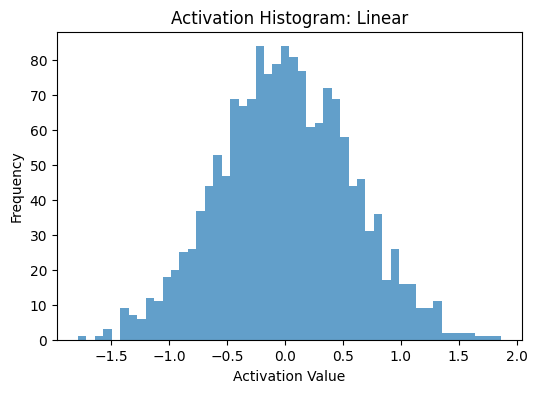

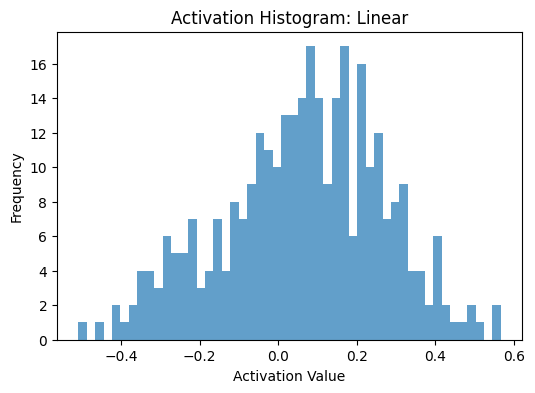

KeyboardInterrupt: 

In [10]:

# Training loop
for epoch in range(3):
    model.train()
    optimizer.zero_grad()
    output = model(input_data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    # Visualize activations after an epoch
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")
    for module, activation in activations.items():
        plt.figure(figsize=(6, 4))
        plt.hist(activation.flatten(), bins=50, alpha=0.7)
        plt.title(f"Activation Histogram: {module.__class__.__name__}")
        plt.xlabel("Activation Value")
        plt.ylabel("Frequency")
        plt.show()
